In [3]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
df = pd.read_csv('/content/drive/MyDrive/DATA /Matches.csv')

<ipython-input-24-74edc8a0fad0>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA /Matches.csv')


In [25]:
df = df.drop(columns=['OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw', 'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize', 'HandiHome', 'HandiAway'])

In [41]:
df.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,HomeRed,AwayRed,date,club,country,HomeTeamElo,date_Away,club_Away,country_Away,AwayTeamElo
0,F1,2000-07-28,NaN,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed'],
      dtype='object')

In [26]:
# Load the EloRatings.csv file
elo = pd.read_csv('/content/drive/MyDrive/DATA /EloRatings.csv')

# Ensure the date columns are in the same format
df['MatchDate'] = pd.to_datetime(df['MatchDate'])
elo['date'] = pd.to_datetime(elo['date'])

## MERGING TWO DATASET
Merge the Elo ratings for both the home and away teams by matching HomeTeam and AwayTeam with club.


In [27]:
# Merge Elo ratings for HomeTeam
df = df.merge(
    elo,
    left_on=['MatchDate', 'HomeTeam'],
    right_on=['date', 'club'],
    how='left',
    suffixes=('', '_Home')
).rename(columns={'elo': 'HomeTeamElo'})

# Merge Elo ratings for AwayTeam
df = df.merge(
    elo,
    left_on=['MatchDate', 'AwayTeam'],
    right_on=['date', 'club'],
    how='left',
    suffixes=('', '_Away')
).rename(columns={'elo': 'AwayTeamElo'})


# View the updated DataFrame
df.head()


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,HomeRed,AwayRed,date,club,country,HomeTeamElo,date_Away,club_Away,country_Away,AwayTeamElo
0,F1,2000-07-28,NaN,Marseille,Troyes,1691.36,1581.55,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1720.51,1636.89,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1458.77,1640.12,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1476.65,1472.12,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1414.12,1614.09,0.0,0.0,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN


# ANALYSIS

### WINS: HOME vs AWAY

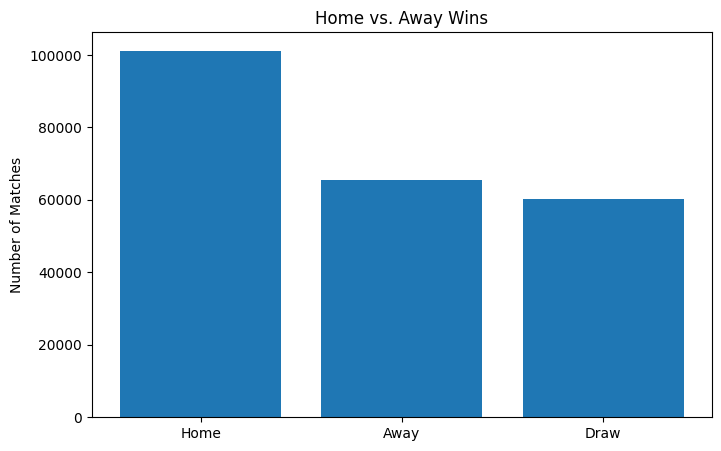

In [ ]:
home_wins = df[df['FTResult'] == 'H'].shape[0]
away_wins = df[df['FTResult'] == 'A'].shape[0]
draws = df[df['FTResult'] == 'D'].shape[0]
plt.figure(figsize=(8, 5))
plt.bar(['Home', 'Away', 'Draw'], [home_wins, away_wins, draws])
plt.title('Home vs. Away Wins')
plt.ylabel('Number of Matches')
plt.show()

## PRE-SEASON, MID SEASON, POST-SEASON COMPARISION


### General trends

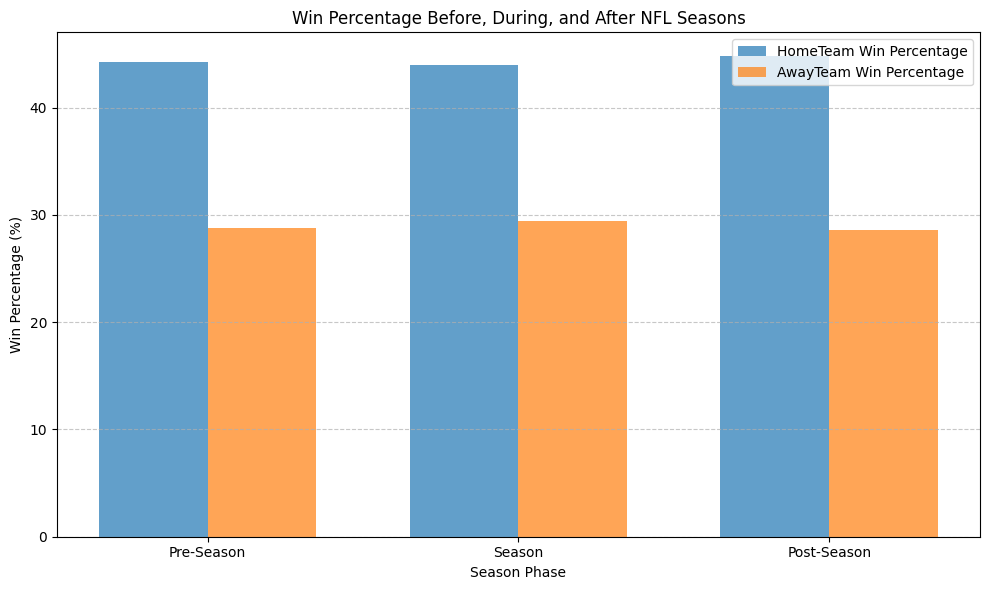

In [ ]:
# Function to categorize season phases
def categorize_season(date):
    if date.month in [7, 8]:
        return 'Pre-Season'
    elif date.month in [9, 10, 11, 12]:
        return 'Season'
    elif date.month in [1, 2]:
        return 'Post-Season'
    else:
        return 'Off-Season'

# Apply season categorization
df['SeasonPhase'] = df['MatchDate'].apply(categorize_season)

# Calculate win counts based on FTResult ('H' for Home win, 'A' for Away win)
df['Winner'] = df['FTResult'].map({'H': 'HomeTeam', 'A': 'AwayTeam'})

total_games = df.groupby('SeasonPhase').size().reset_index(name='TotalGames')
win_trends = df.groupby(['SeasonPhase', 'Winner']).size().reset_index(name='WinCount')

# Merge total games with win trends for percentage calculation
win_trends = win_trends.merge(total_games, on='SeasonPhase')
win_trends['WinPercentage'] = (win_trends['WinCount'] / win_trends['TotalGames']) * 100

# Filter to include only pre-season, regular season, and post-season
filtered_trends = win_trends[win_trends['SeasonPhase'].isin(['Pre-Season', 'Season', 'Post-Season'])]

# Plotting win percentages using a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
phases = ['Pre-Season', 'Season', 'Post-Season']

# Separate data for HomeTeam and AwayTeam
home_data = filtered_trends[filtered_trends['Winner'] == 'HomeTeam']['WinPercentage']
away_data = filtered_trends[filtered_trends['Winner'] == 'AwayTeam']['WinPercentage']

# X-axis positions for bars
x = range(len(phases))

# Create bar chart
plt.bar(x, home_data, width=bar_width, label='HomeTeam Win Percentage', alpha=0.7)
plt.bar([p + bar_width for p in x], away_data, width=bar_width, label='AwayTeam Win Percentage', alpha=0.7)

# Add details to the chart
plt.title('Win Percentage Before, During, and After NFL Seasons')
plt.xlabel('Season Phase')
plt.ylabel('Win Percentage (%)')
plt.xticks([p + bar_width / 2 for p in x], phases)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
season_game_counts = df['SeasonPhase'].value_counts().reset_index()
season_game_counts.columns = ['SeasonPhase', 'GameCount']
season_game_counts

,SeasonPhase,GameCount
0,Season,90455
1,Off-Season,68234
2,Post-Season,40336
3,Pre-Season,27730


## FACTORS THAT CONTRIBUTE TO TEAM SUCCESS

### PENALTIES

Red and yellow cards received

In [ ]:
# Filter teams with Elo rating > 2000
high_elo_teams = set(df[df['HomeTeamElo'] > 2000]['HomeTeam']).union(
    set(df[df['AwayTeamElo'] > 2000]['AwayTeam']))

# Create a dictionary to store red cards per game for each high Elo team
high_elo_team_stats = {}

# Loop through each high Elo team to calculate red cards per game
for team in high_elo_teams:
    # Count home and away games
    home_games = df[df['HomeTeam'] == team]
    away_games = df[df['AwayTeam'] == team]

    total_games = len(home_games) + len(away_games)

    # Sum red cards received in home and away games
    total_red_cards = home_games['HomeRed'].sum() + away_games['AwayRed'].sum()

    # Calculate red cards per game (avoid division by zero)
    red_cards_per_game = (total_red_cards / total_games) if total_games > 0 else 0

    # Store in dictionary
    high_elo_team_stats[team] = red_cards_per_game

high_elo_red_cards_df = pd.DataFrame(high_elo_team_stats.items(), columns=['Team', 'RedCardsPerGame'])

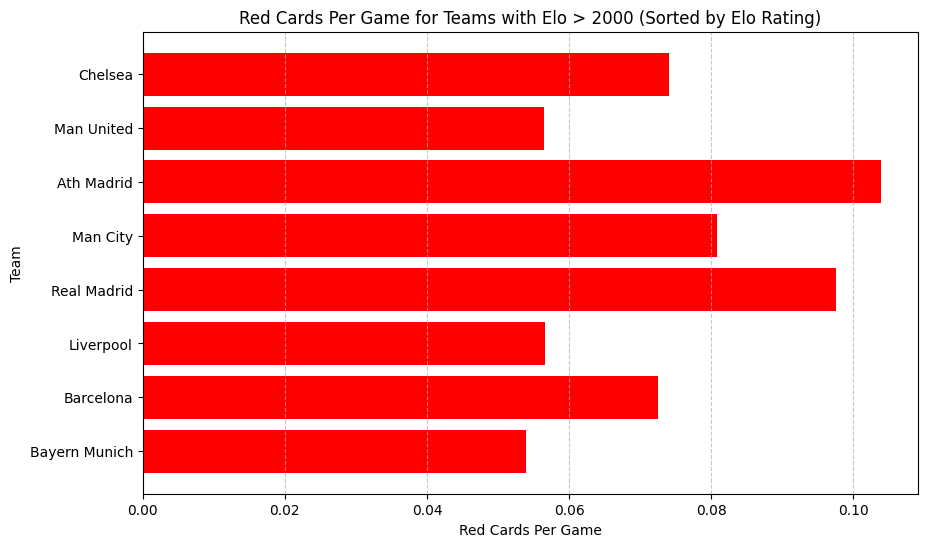

In [ ]:
# Get the highest Elo rating for each team (either as Home or Away)
team_elo_ratings = {
    team: max(df[df['HomeTeam'] == team]['HomeTeamElo'].max(skipna=True),
              df[df['AwayTeam'] == team]['AwayTeamElo'].max(skipna=True))
    for team in high_elo_teams
}

# Convert Elo ratings into DataFrame
elo_df = pd.DataFrame(team_elo_ratings.items(), columns=['Team', 'EloRating'])

# Merge with red cards per game DataFrame
sorted_high_elo_df = high_elo_red_cards_df.merge(elo_df, on='Team')

# Sort by Elo rating in descending order
sorted_high_elo_df = sorted_high_elo_df.sort_values(by='EloRating', ascending=False)

# Plot using Matplotlib with horizontal bars, sorted by Elo rating
plt.figure(figsize=(10, 6))
plt.barh(sorted_high_elo_df['Team'], sorted_high_elo_df['RedCardsPerGame'], color='red')

plt.ylabel("Team")
plt.xlabel("Red Cards Per Game")
plt.title("Red Cards Per Game for Teams with Elo > 2000 (Sorted by Elo Rating)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



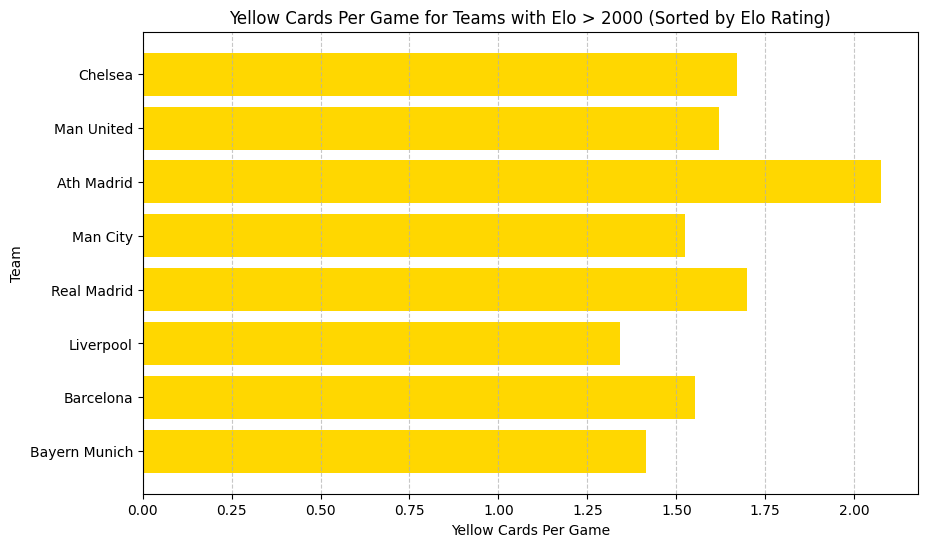

In [ ]:
# Calculate total yellow cards per game for each high Elo team
high_elo_team_yellow_cards = {}

for team in high_elo_teams:
    # Count home and away games
    home_games = df[df['HomeTeam'] == team]
    away_games = df[df['AwayTeam'] == team]

    total_games = len(home_games) + len(away_games)  # Total matches played by team

    # Sum yellow cards received in home and away games
    total_yellow_cards = home_games['HomeYellow'].sum() + away_games['AwayYellow'].sum()

    # Calculate yellow cards per game (avoid division by zero)
    yellow_cards_per_game = total_yellow_cards / total_games if total_games > 0 else 0

    # Store in dictionary
    high_elo_team_yellow_cards[team] = yellow_cards_per_game

# Convert to DataFrame
high_elo_yellow_cards_df = pd.DataFrame(high_elo_team_yellow_cards.items(), columns=['Team', 'YellowCardsPerGame'])

# Merge with Elo ratings and sort by Elo rating
sorted_high_elo_yellow_df = high_elo_yellow_cards_df.merge(elo_df, on='Team')
sorted_high_elo_yellow_df = sorted_high_elo_yellow_df.sort_values(by='EloRating', ascending=False)

# Plot using Matplotlib with horizontal bars for yellow cards
plt.figure(figsize=(10, 6))
plt.barh(sorted_high_elo_yellow_df['Team'], sorted_high_elo_yellow_df['YellowCardsPerGame'], color='gold')

plt.ylabel("Team")
plt.xlabel("Yellow Cards Per Game")
plt.title("Yellow Cards Per Game for Teams with Elo > 2000 (Sorted by Elo Rating)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


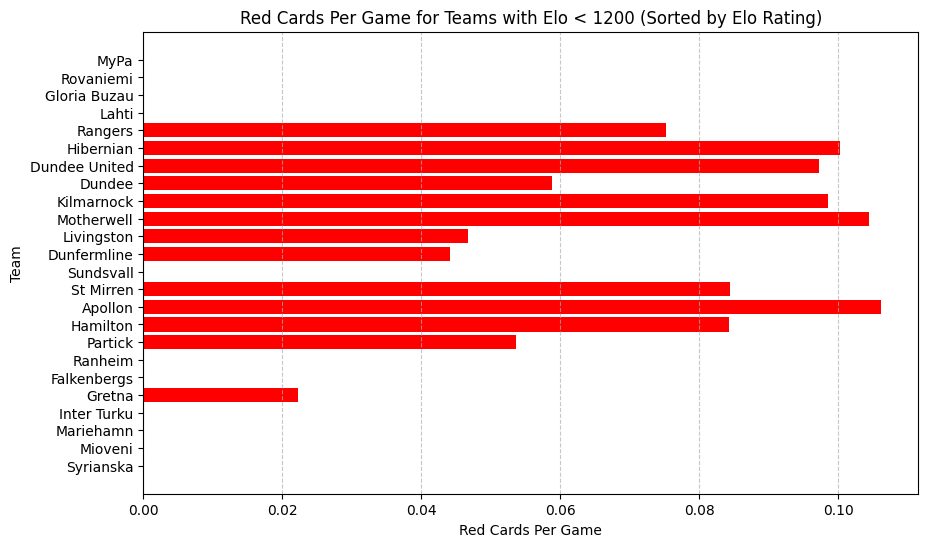

In [ ]:
# Filter teams with Elo rating < 1200
low_elo_teams = set(df[df['HomeTeamElo'] < 1200]['HomeTeam']).union(
    set(df[df['AwayTeamElo'] < 1200]['AwayTeam'])
)

# Calculate red cards per game for low Elo teams
low_elo_team_red_cards = {}

for team in low_elo_teams:
    # Count home and away games
    home_games = df[df['HomeTeam'] == team]
    away_games = df[df['AwayTeam'] == team]

    total_games = len(home_games) + len(away_games)  # Total matches played by team

    # Sum red cards received in home and away games
    total_red_cards = home_games['HomeRed'].sum() + away_games['AwayRed'].sum()

    # Calculate red cards per game (avoid division by zero)
    red_cards_per_game = total_red_cards / total_games if total_games > 0 else 0

    # Store in dictionary
    low_elo_team_red_cards[team] = red_cards_per_game

# Convert to DataFrame
low_elo_red_cards_df = pd.DataFrame(low_elo_team_red_cards.items(), columns=['Team', 'RedCardsPerGame'])

# Get Elo ratings for low Elo teams
low_elo_team_elo_ratings = {
    team: max(df[df['HomeTeam'] == team]['HomeTeamElo'].max(skipna=True),
              df[df['AwayTeam'] == team]['AwayTeamElo'].max(skipna=True))
    for team in low_elo_teams
}

# Convert Elo ratings into DataFrame
low_elo_df = pd.DataFrame(low_elo_team_elo_ratings.items(), columns=['Team', 'EloRating'])

# Merge with red cards per game DataFrame and sort by Elo rating
sorted_low_elo_red_df = low_elo_red_cards_df.merge(low_elo_df, on='Team')
sorted_low_elo_red_df = sorted_low_elo_red_df.sort_values(by='EloRating', ascending=True)

# Plot red cards per game for low Elo teams
plt.figure(figsize=(10, 6))
plt.barh(sorted_low_elo_red_df['Team'], sorted_low_elo_red_df['RedCardsPerGame'], color='red')

plt.ylabel("Team")
plt.xlabel("Red Cards Per Game")
plt.title("Red Cards Per Game for Teams with Elo < 1200 (Sorted by Elo Rating)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


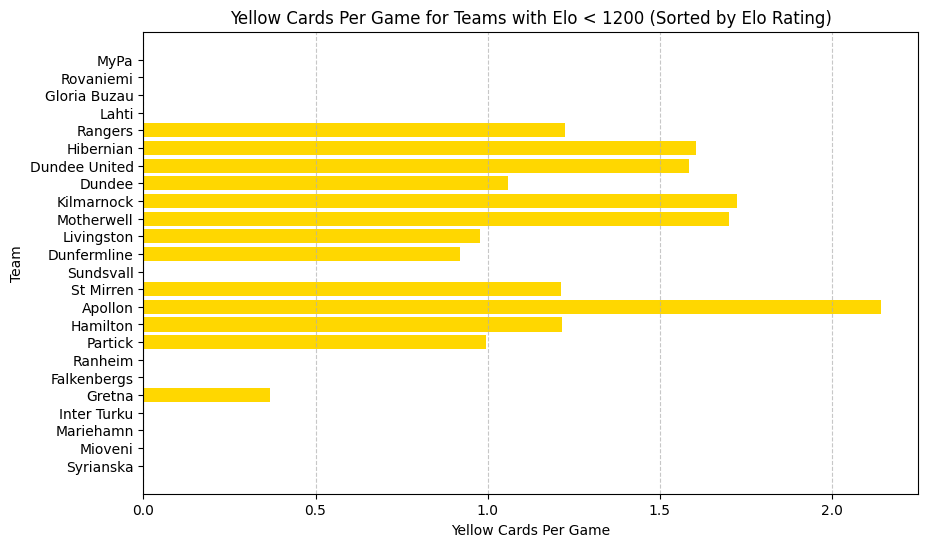

In [ ]:
# Calculate yellow cards per game for low Elo teams
low_elo_team_yellow_cards = {}

for team in low_elo_teams:
    # Count home and away games
    home_games = df[df['HomeTeam'] == team]
    away_games = df[df['AwayTeam'] == team]

    total_games = len(home_games) + len(away_games)  # Total matches played by team

    # Sum yellow cards received in home and away games
    total_yellow_cards = home_games['HomeYellow'].sum() + away_games['AwayYellow'].sum()

    # Calculate yellow cards per game (avoid division by zero)
    yellow_cards_per_game = total_yellow_cards / total_games if total_games > 0 else 0

    # Store in dictionary
    low_elo_team_yellow_cards[team] = yellow_cards_per_game

# Convert to DataFrame
low_elo_yellow_cards_df = pd.DataFrame(low_elo_team_yellow_cards.items(), columns=['Team', 'YellowCardsPerGame'])

# Merge with Elo ratings and sort by Elo rating
sorted_low_elo_yellow_df = low_elo_yellow_cards_df.merge(low_elo_df, on='Team')
sorted_low_elo_yellow_df = sorted_low_elo_yellow_df.sort_values(by='EloRating', ascending=True)

# Plot yellow cards per game for low Elo teams
plt.figure(figsize=(10, 6))
plt.barh(sorted_low_elo_yellow_df['Team'], sorted_low_elo_yellow_df['YellowCardsPerGame'], color='gold')

plt.ylabel("Team")
plt.xlabel("Yellow Cards Per Game")
plt.title("Yellow Cards Per Game for Teams with Elo < 1200 (Sorted by Elo Rating)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Fouls per game

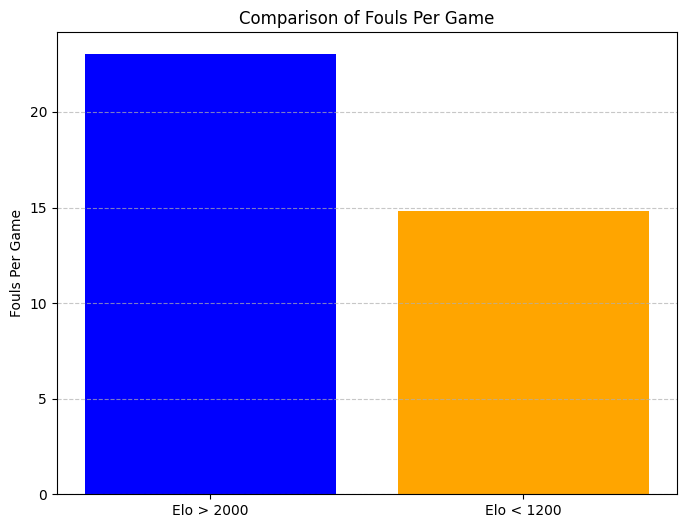

In [ ]:
# Calculate total fouls per game for high Elo teams
total_fouls_high_elo = df[(df['HomeTeamElo'] > 2000) | (df['AwayTeamElo'] > 2000)]
total_fouls_high_elo = (total_fouls_high_elo['HomeFouls'] + total_fouls_high_elo['AwayFouls']).sum() / len(total_fouls_high_elo)

# Calculate total fouls per game for low Elo teams
total_fouls_low_elo = df[(df['HomeTeamElo'] < 1200) | (df['AwayTeamElo'] < 1200)]
total_fouls_low_elo = (total_fouls_low_elo['HomeFouls'] + total_fouls_low_elo['AwayFouls']).sum() / len(total_fouls_low_elo)

# Create bar chart comparing fouls per game
plt.figure(figsize=(8, 6))
plt.bar(['Elo > 2000', 'Elo < 1200'], [total_fouls_high_elo, total_fouls_low_elo], color=['blue', 'orange'])

plt.ylabel("Fouls Per Game")
plt.title("Comparison of Fouls Per Game")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### TEAMS ANALYSIS

In [ ]:
teams = ["Barcelona", "Real Madrid"]

barcelona_real_madrid_games = df[(df["HomeTeam"].isin(teams)) | (df["AwayTeam"].isin(teams))]


In [ ]:
barcelona_real_madrid_games.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
485,SP1,2000-09-09,NaN,Barcelona,Malaga,1898.94,1736.13,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,SP1,2000-09-09,NaN,Real Madrid,Valencia,1889.85,1905.06,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,SP1,2000-09-16,NaN,Ath Bilbao,Barcelona,1774.92,1898.94,0.0,0.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,SP1,2000-09-16,NaN,Malaga,Real Madrid,1736.13,1889.85,0.0,0.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,SP1,2000-09-23,NaN,Barcelona,Santander,1898.94,1760.33,5.0,8.0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
barcelona_real_madrid_games.columns


Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed'],
      dtype='object')

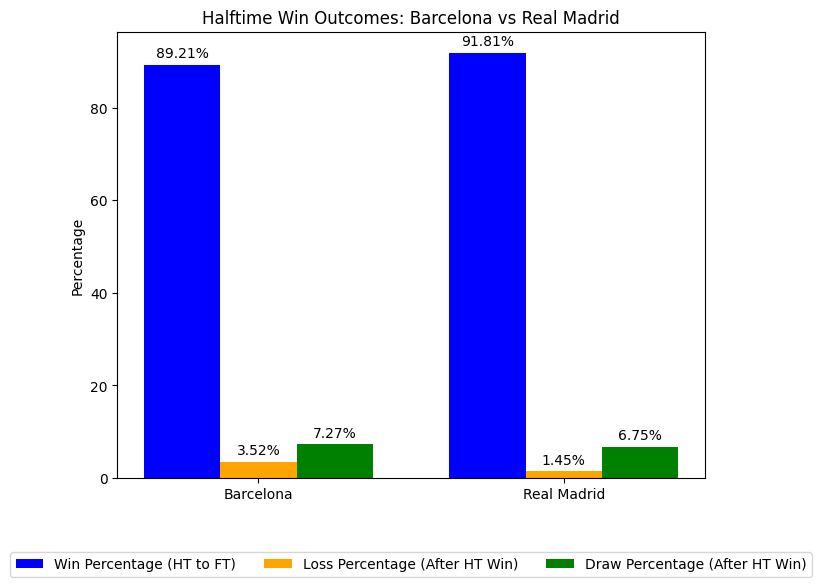

In [ ]:

results = {}

for team in teams:
    # Halftime wins (when the team was leading at halftime and won the game)
    ht_win_ft_win = barcelona_real_madrid_games[
        ((barcelona_real_madrid_games["HomeTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "H") & (barcelona_real_madrid_games["HTResult"] == "H")) |
        ((barcelona_real_madrid_games["AwayTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "A") & (barcelona_real_madrid_games["HTResult"] == "A"))
    ]

    # Halftime draws (when the team was leading at halftime but drew the game)
    ht_win_ft_draw = barcelona_real_madrid_games[
        ((barcelona_real_madrid_games["HomeTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "D") & (barcelona_real_madrid_games["HTResult"] == "H")) |
        ((barcelona_real_madrid_games["AwayTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "D") & (barcelona_real_madrid_games["HTResult"] == "A"))
    ]

    # Halftime losses (when the team was leading at halftime but lost the game)
    ht_win_ft_loss = barcelona_real_madrid_games[
        ((barcelona_real_madrid_games["HomeTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "A") & (barcelona_real_madrid_games["HTResult"] == "H")) |
        ((barcelona_real_madrid_games["AwayTeam"] == team) & (barcelona_real_madrid_games["FTResult"] == "H") & (barcelona_real_madrid_games["HTResult"] == "A"))
    ]

    # Total halftime wins
    total_ht_wins = len(ht_win_ft_win) + len(ht_win_ft_draw) + len(ht_win_ft_loss)

    # Percentages
    win_percentage = (len(ht_win_ft_win) / total_ht_wins) * 100 if total_ht_wins > 0 else 0
    draw_percentage = (len(ht_win_ft_draw) / total_ht_wins) * 100 if total_ht_wins > 0 else 0
    loss_percentage = (len(ht_win_ft_loss) / total_ht_wins) * 100 if total_ht_wins > 0 else 0

    results[team] = {
        "Win Percentage": win_percentage,
        "Draw Percentage": draw_percentage,
        "Loss Percentage": loss_percentage,
    }

# Extract data for plotting
teams = list(results.keys())
win_percentages = [results[team]["Win Percentage"] for team in teams]
draw_percentages = [results[team]["Draw Percentage"] for team in teams]
loss_percentages = [results[team]["Loss Percentage"] for team in teams]

# Plotting
x = np.arange(len(teams))  # Label locations
width = 0.25  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))

# Bar plots
bar1 = ax.bar(x - width, win_percentages, width, label='Win Percentage (HT to FT)', color='blue')
bar2 = ax.bar(x, loss_percentages, width, label='Loss Percentage (After HT Win)', color='orange')
bar3 = ax.bar(x + width, draw_percentages, width, label='Draw Percentage (After HT Win)', color='green')

# Adding labels and title
ax.set_ylabel('Percentage')
ax.set_title('Halftime Win Outcomes: Barcelona vs Real Madrid')
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Annotating percentages on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for text
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

# Display the chart
plt.tight_layout()
plt.show()


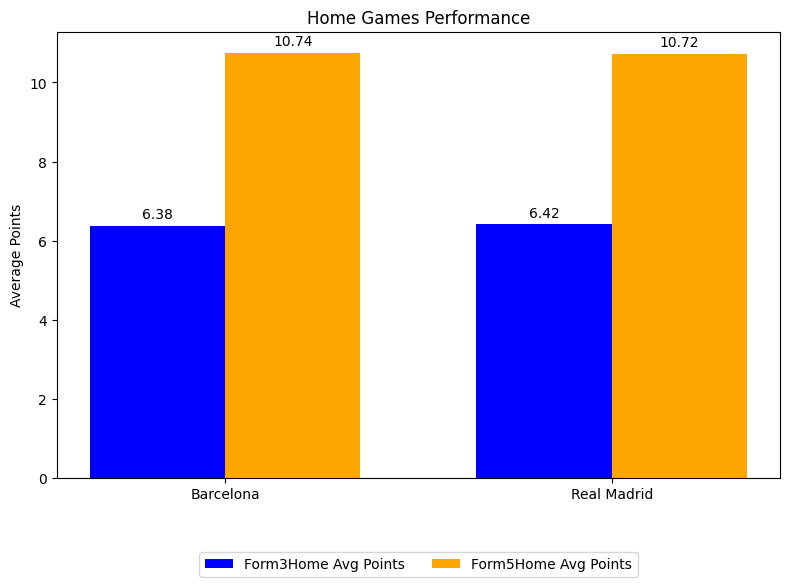

In [ ]:
teams = ["Barcelona", "Real Madrid"]

# Filtering for home games where either Barcelona or Real Madrid is the home team
home_games = df[df["HomeTeam"].isin(teams)]

# Calculate the average points of Form3Home for each team
average_form3home_points = home_games.groupby("HomeTeam")["Form3Home"].mean().reset_index()
average_form3home_points.columns = ["Team", "Average Form3Home Points"]

# Calculate the average points of Form5Home for each team
average_form5home_points = home_games.groupby("HomeTeam")["Form5Home"].mean().reset_index()
average_form5home_points.columns = ["Team", "Average Form5Home Points"]

# Data for plotting
teams = average_form3home_points["Team"].values
form3home_avg = average_form3home_points["Average Form3Home Points"].values
form5home_avg = average_form5home_points["Average Form5Home Points"].values

# Bar chart parameters
x = np.arange(len(teams))  # Label locations
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))

# Bar plots
bar1 = ax.bar(x - width/2, form3home_avg, width, label="Form3Home Avg Points", color="blue")
bar2 = ax.bar(x + width/2, form5home_avg, width, label="Form5Home Avg Points", color="orange")

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel("Average Points")
ax.set_title("Home Games Performance")
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Annotate bars with their values
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset for text
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Display the chart
plt.tight_layout()
plt.show()


### TOP 25% VS BOTTOM 25% ANALYSIS

In [ ]:
team_elo_avg = elo.groupby('club')['elo'].mean()

# Select top 5 highest and lowest Elo ranking teams
top_5_teams = team_elo_avg.nlargest(5).index.tolist()
bottom_5_teams = team_elo_avg.nsmallest(5).index.tolist()

top_5_teams, bottom_5_teams

(['Barcelona', 'Real Madrid', 'Bayern Munich', 'Man United', 'Chelsea'],
 ['Extensiv Craiova', 'UM Timisoara', 'Onesti', 'Vaesteras', 'Resita'])

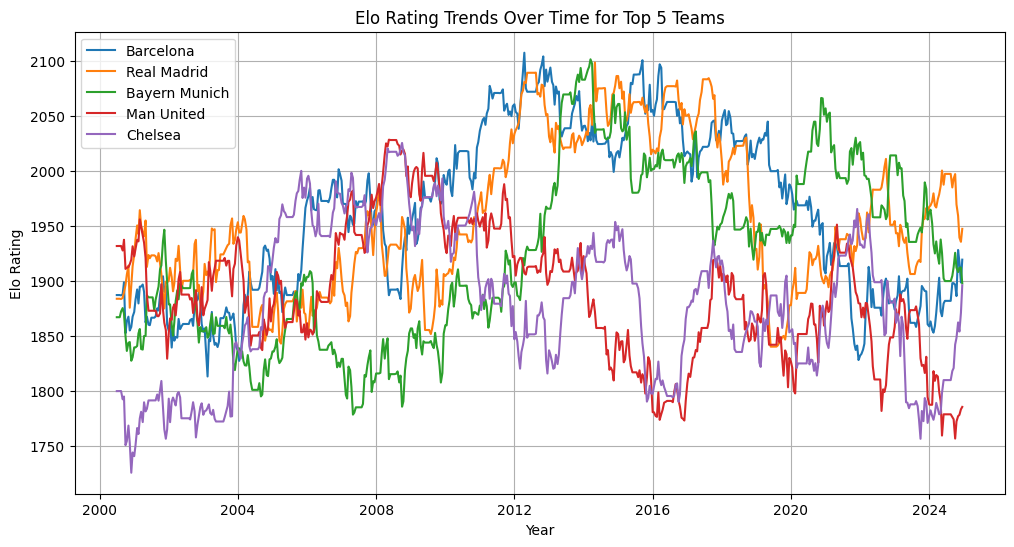

In [ ]:
# top 5

# Filter data for the selected top 5 teams
top_teams_df = elo[elo['club'].isin(top_5_teams)]

# Group by date and club, taking the mean Elo rating for each team over time
top_teams_avg_elo = top_teams_df.groupby(['date', 'club'])['elo'].mean().unstack()

# Plot the Elo ratings over time
plt.figure(figsize=(12, 6))
for team in top_5_teams:
    plt.plot(top_teams_avg_elo.index, top_teams_avg_elo[team], label=team)

plt.xlabel('Year')
plt.ylabel('Elo Rating')
plt.title('Elo Rating Trends Over Time for Top 5 Teams')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# bottom 5

# Filter data for the selected bottom 5 teams
bottom_teams_df = elo[elo['club'].isin(bottom_5_teams)]

# Group by date and club, taking the mean Elo rating for each team over time
bottom_teams_avg_elo = bottom_teams_df.groupby(['date', 'club'])['elo'].mean().unstack()

# Plot the Elo ratings over time
plt.figure(figsize=(12, 6))
for team in bottom_5_teams:
    plt.plot(bottom_teams_avg_elo.index, bottom_teams_avg_elo[team], label=team)

plt.xlabel('Year')
plt.ylabel('Elo Rating')
plt.title('Elo Rating Trends Over Time for Bottom 5 Teams')
plt.legend()
plt.grid(True)
plt.show()

TypeError: 'float' object is not subscriptable

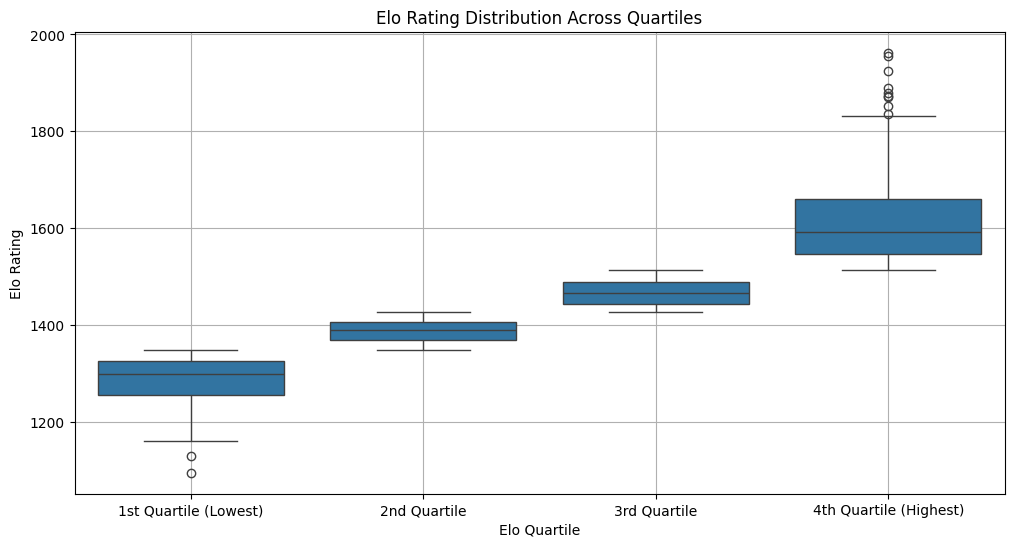

In [10]:
import seaborn as sns
team_elo_avg = elo.groupby('club')['elo'].mean().sort_values(ascending=False)

# Define quartiles
q1_threshold = team_elo_avg.quantile(0.25)
q2_threshold = team_elo_avg.quantile(0.50)
q3_threshold = team_elo_avg.quantile(0.75)

# Assign quartile labels to each team
quartile_labels = []
for elo in team_elo_avg:
    if elo <= q1_threshold:
        quartile_labels.append("1st Quartile (Lowest)")
    elif elo <= q2_threshold:
        quartile_labels.append("2nd Quartile")
    elif elo <= q3_threshold:
        quartile_labels.append("3rd Quartile")
    else:
        quartile_labels.append("4th Quartile (Highest)")

# Create a DataFrame for visualization
quartile_df = pd.DataFrame({"Team": team_elo_avg.index, "Elo": team_elo_avg.values, "Quartile": quartile_labels})

# Plot the quartile distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=quartile_df, x="Quartile", y="Elo", order=[
    "1st Quartile (Lowest)", "2nd Quartile", "3rd Quartile", "4th Quartile (Highest)"
])
plt.xlabel("Elo Quartile")
plt.ylabel("Elo Rating")
plt.title("Elo Rating Distribution Across Quartiles")
plt.grid(True)
plt.show()


In [13]:
quartile_df[quartile_df['Quartile'] == '1st Quartile (Lowest)']

,Team,Elo,Quartile
669,Erzurum BB,1347.644000,1st Quartile (Lowest)
670,Slask,1347.501734,1st Quartile (Lowest)
671,Bistrita,1347.148552,1st Quartile (Lowest)
672,Volendam,1346.093333,1st Quartile (Lowest)
673,Hibernian,1345.967024,1st Quartile (Lowest)
...,...,...,...
888,Resita,1178.050000,1st Quartile (Lowest)
889,Vaesteras,1168.705000,1st Quartile (Lowest)
890,Onesti,1160.160000,1st Quartile (Lowest)
891,UM Timisoara,1128.930000,1st Quartile (Lowest)


### GAME STATS: DISCIPLINE

In [28]:
team_home_elo_avg = df.groupby('club')['AwayElo'].mean().sort_values(ascending=False)
# Determine the thresholds for the 1st (bottom 25%) and 4th (top 25%) quartiles
q1_threshold = team_home_elo_avg.quantile(0.25)
q4_threshold = team_home_elo_avg.quantile(0.75)
# Get teams in the bottom 25% of HomeElo rankings
bottom_25_percent_teams = team_home_elo_avg[team_home_elo_avg <= q1_threshold]
# Get teams in the top 25% of HomeElo rankings
top_25_percent_teams = team_home_elo_avg[team_home_elo_avg >= q4_threshold]
# Extract team names
bottom_25_team_names = bottom_25_percent_teams.index.tolist()
top_25_team_names = top_25_percent_teams.index.tolist()
# Filter the original DataFrame for these teams
bottom_25_df = df[df['club'].isin(bottom_25_team_names)]
top_25_df = df[df['club'].isin(top_25_team_names)]
min_rows = min(len(bottom_25_df), len(top_25_df))
# Sample randomly from each group to make them equal in size
min_rows = min(len(bottom_25_df), len(top_25_df))
# Slice the data to match row counts for both datasets
bottom_25_df = bottom_25_df.head(min_rows)
top_25_df = top_25_df.head(min_rows)

FOULS

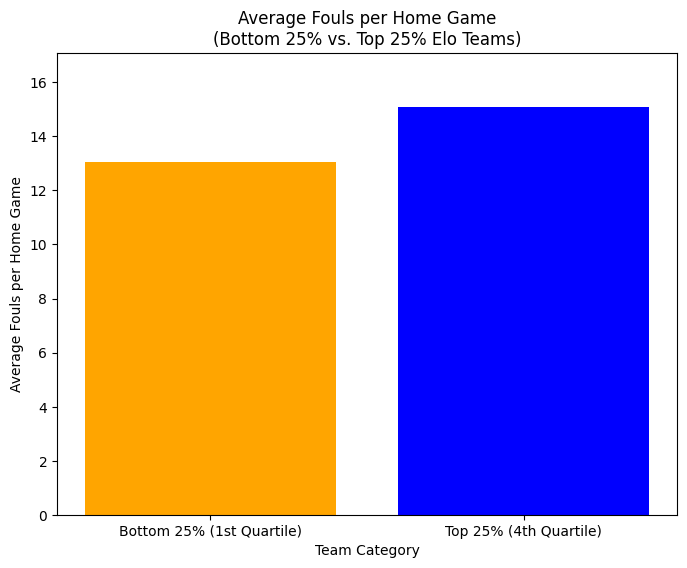

In [34]:
# Calculate average fouls for home games
avg_fouls_home_bottom_25 = bottom_25_df['HomeFouls'].mean()
avg_fouls_home_top_25 = top_25_df['HomeFouls'].mean()

# Calculate average fouls for away games
avg_fouls_away_bottom_25 = bottom_25_df['AwayFouls'].mean()
avg_fouls_away_top_25 = top_25_df['AwayFouls'].mean()

# Data for visualization
categories = ["Bottom 25% (1st Quartile)", "Top 25% (4th Quartile)"]
home_avg_fouls = [avg_fouls_home_bottom_25, avg_fouls_home_top_25]
away_avg_fouls = [avg_fouls_away_bottom_25, avg_fouls_away_top_25]

# Create a bar chart for home games
plt.figure(figsize=(8, 6))
plt.bar(categories, home_avg_fouls, color=["orange", "blue"])
plt.title("Average Fouls per Home Game\n(Bottom 25% vs. Top 25% Elo Teams)")
plt.xlabel("Team Category")
plt.ylabel("Average Fouls per Home Game")
plt.ylim(0, max(home_avg_fouls) + 2)
plt.show()


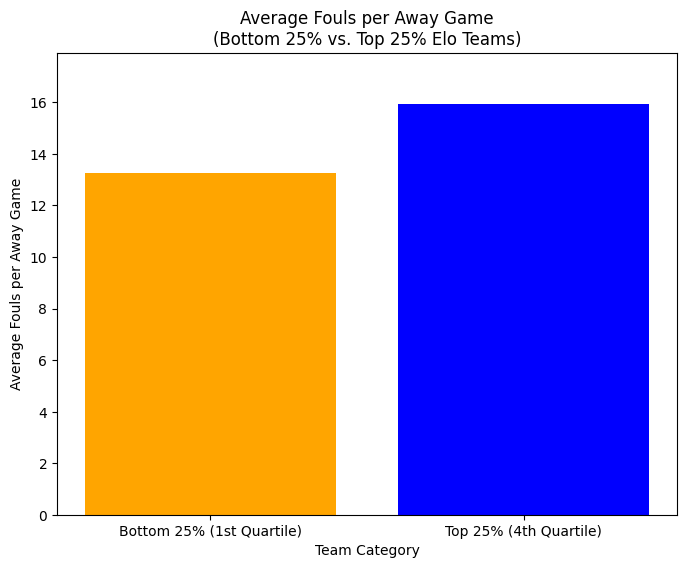

In [33]:
# Create a bar chart for away games
plt.figure(figsize=(8, 6))
plt.bar(categories, away_avg_fouls, color=["orange", "blue"])
plt.title("Average Fouls per Away Game\n(Bottom 25% vs. Top 25% Elo Teams)")
plt.xlabel("Team Category")
plt.ylabel("Average Fouls per Away Game")
plt.ylim(0, max(away_avg_fouls) + 2)
plt.show()

YELLOW

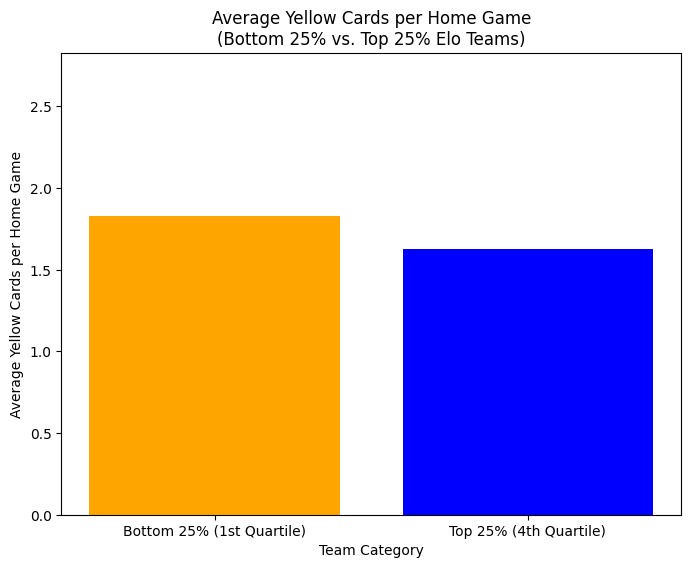

In [37]:
# Calculate the average yellow cards for home games for bottom 25% teams
avg_yellow_cards_home_bottom_25 = bottom_25_df['HomeYellow'].mean()

# Calculate the average yellow cards for home games for top 25% teams
avg_yellow_cards_home_top_25 = top_25_df['HomeYellow'].mean()

# Data for visualization
categories = ["Bottom 25% (1st Quartile)", "Top 25% (4th Quartile)"]
avg_yellow_cards_home = [avg_yellow_cards_home_bottom_25, avg_yellow_cards_home_top_25]

# Create a bar chart for yellow cards in home games
plt.figure(figsize=(8, 6))
plt.bar(categories, avg_yellow_cards_home, color=["orange", "blue"])
plt.title("Average Yellow Cards per Home Game\n(Bottom 25% vs. Top 25% Elo Teams)")
plt.xlabel("Team Category")
plt.ylabel("Average Yellow Cards per Home Game")
plt.ylim(0, max(avg_yellow_cards_home) + 1)
plt.show()


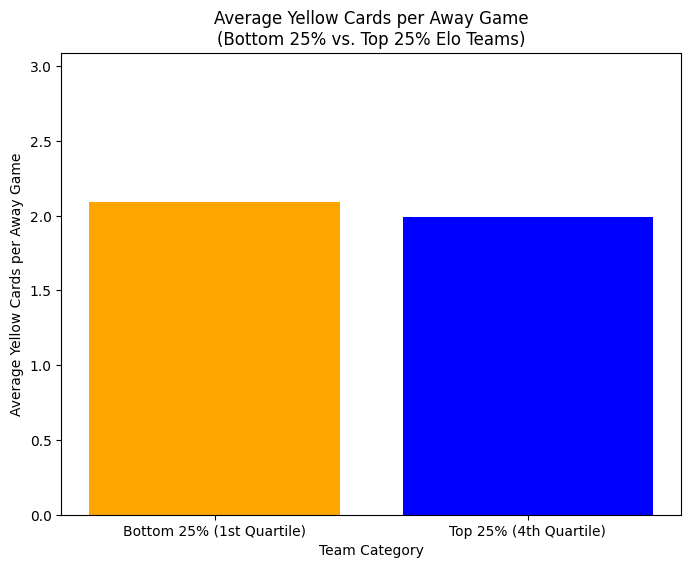

In [39]:
# Calculate the average yellow cards for away games for bottom 25% teams
avg_yellow_cards_away_bottom_25 = bottom_25_df['AwayYellow'].mean()

# Calculate the average yellow cards for away games for top 25% teams
avg_yellow_cards_away_top_25 = top_25_df['AwayYellow'].mean()

# Data for visualization
categories = ["Bottom 25% (1st Quartile)", "Top 25% (4th Quartile)"]
avg_yellow_cards_away = [avg_yellow_cards_away_bottom_25, avg_yellow_cards_away_top_25]

# Create a bar chart for yellow cards in away games
plt.figure(figsize=(8, 6))
plt.bar(categories, avg_yellow_cards_away, color=["orange", "blue"])
plt.title("Average Yellow Cards per Away Game\n(Bottom 25% vs. Top 25% Elo Teams)")
plt.xlabel("Team Category")
plt.ylabel("Average Yellow Cards per Away Game")
plt.ylim(0, max(avg_yellow_cards_away) + 1)
plt.show()
